In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.core.reshape.reshape import unstack

### 집계, 필터, 변환, 적용

In [2]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1' : range(6),
                   'data2' : rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [10]:
print(df.groupby('key').aggregate(['min', np.median, max]))
print(df.groupby('key').aggregate({'data1' : 'min', 'data2' : 'max'}))


    data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9
     data1  data2
key              
A        0      5
B        1      7
C        2      9


/var/folders/gt/tz5c2kn54nb9jgb_djd6v8x00000gn/T/ipykernel_48651/4213854202.py:1: FutureWarning: The provided callable <function median at 0x10d9ca660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(df.groupby('key').aggregate(['min', np.median, max]))
/var/folders/gt/tz5c2kn54nb9jgb_djd6v8x00000gn/T/ipykernel_48651/4213854202.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print(df.groupby('key').aggregate(['min', np.median, max]))


In [14]:
# 필터링
# 필터링 연산을  사용하면 그룹 속성을 기준으로 데이터를 걸러낼 수 있다.

def filter_func(x):
    # 표준 편차가 4보다 큰 경우
    return x['data2'].std() > 4

print(df);print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [15]:
# apply() 메서드
# apply()는 임의의 함수를 그룹 결과에 적용할 때 사용한다.
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

print(df);print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
      key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9


/var/folders/gt/tz5c2kn54nb9jgb_djd6v8x00000gn/T/ipykernel_48651/2212922858.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df);print(df.groupby('key').apply(norm_by_data2))


### 분할 키 지정하기

In [20]:
L = [0, 1, 0, 1, 2, 0]
print(df);print(df.groupby('key').sum(), '\n')
print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12 

     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [26]:
# 인덱스 값을 그룹키에 매핑하는 딕셔너리
df2 = df.set_index('key')
mapping = {'A' : 'vowel', 'B' : 'consonant', 'C' : 'consonant'}
print(df2);print(df2.groupby(mapping).sum(), '\n')

# 파이썬 함수
print(df2.groupby(str.lower).mean())

# 다중 인덱스
print(df2.groupby([str.lower, mapping]).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8 

     data1  data2
key              
a      1.5    4.0
b      2.5    3.5
c      3.5    6.0
               data1  data2
key key                    
a   vowel        1.5    4.0
b   consonant    2.5    3.5
c   consonant    3.5    6.0


# 피벗 테이블

#### 피벗 테이블은 근본적으로 GroupBy 집계의 다차원 버전이라고 생각하면 된다.

In [30]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
print(titanic.groupby('sex')['survived'].mean(),'\n')
print(titanic.groupby(['sex', 'class'], observed=False)['survived'].aggregate('mean').unstack())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64 

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [55]:
titanic.pivot_table('survived', index='sex', columns='class', observed='survived')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [58]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class', observed=False)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# 예제: 출생률 데이터

In [116]:
births = pd.read_csv('births.csv')

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [132]:
births['decode'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decode', columns='gender', aggfunc='sum')

gender,F,M
decode,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


Text(0, 0.5, 'total births per year')

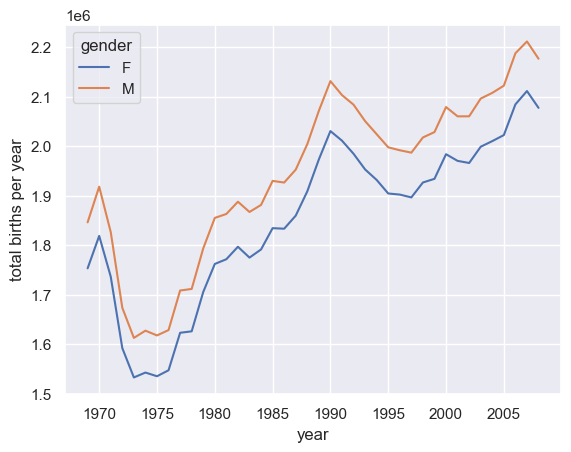

In [66]:
%matplotlib inline
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

### 날짜오타나 누락된 값으로 인한 이상치 제거

In [117]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


/var/folders/gt/tz5c2kn54nb9jgb_djd6v8x00000gn/T/ipykernel_48651/1377010235.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean births by day')

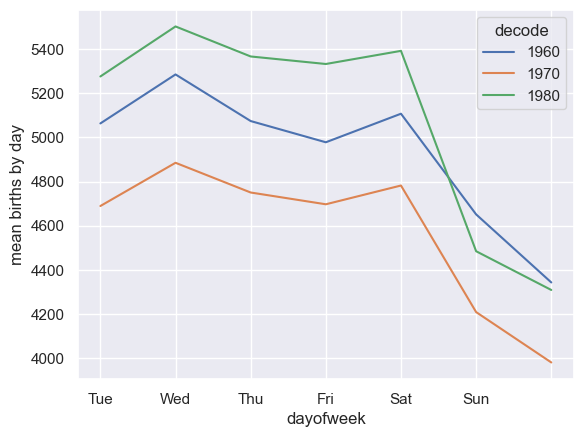

In [134]:
# percentitle 백분위 수
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]

# 표본 평균의 견고한 추정치로 0.74는 가우스 분포의 사분위 수에서 비롯한 것이다.
# Sigma clipping
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# 'day'열을 정수형으로 설정, 원래는 널 값 때문에 문자열이었다.
births['day'] = births['day'].astype(int)

# 년, 월, 일로부터 날짜 인덱스 생성
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

births.pivot_table('births', index='dayofweek', columns='decode', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')


# 벡터화된 문자열 연산

In [148]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

print(monte.str.lower(),'\n')
print(monte.str.len(), '\n')
print(monte.str.startswith('T'))

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object 

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64 

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool


### 정규 표현식을 활용하는 메서드

* match() : 각 요소에 부울 값 반환
* extract() : 문자열로 매칭된 그룹을 반환
* replace() 패턴이 발생한 곳을 다른 문자열로 대체
* contains() : 부울 값을 반환
* count() : 패턴의 발생 건수를 집계

In [151]:
# 각 요소의 시작 문자와 붙어 있는 그룹을 요청해 각 요소로부터 이름 부분 추출
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [154]:
# 벡터화된 항목의 접근 및 슬라이싱
# 각 배열의 첫 세 문자의 슬라이스를 얻는다.
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [158]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
print(full_monte)

             name   info
0  Graham Chapman  B|C|D
1     John Cleese    B|D
2   Terry Gilliam    A|C
3       Eric Idle    B|D
4     Terry Jones    B|C
5   Michael Palin  B|C|D


In [157]:
# get_dummies()를 사용하면 DataFrame으로 신속하게 나눌 수 있다
print(full_monte['info'].str.get_dummies('|'))

   A  B  C  D
0  0  1  1  1
1  0  1  0  1
2  1  0  1  0
3  0  1  0  1
4  0  1  1  0
5  0  1  1  1
